# Wavelet Analysis: Part One

## Background and Motivation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.io import wavfile
import math
plt.style.use('dark_background')

In [4]:
# Load .wav file data
sample_rate, signal_data = wavfile.read('jingle_bells.wav')
print(sample_rate)

10000


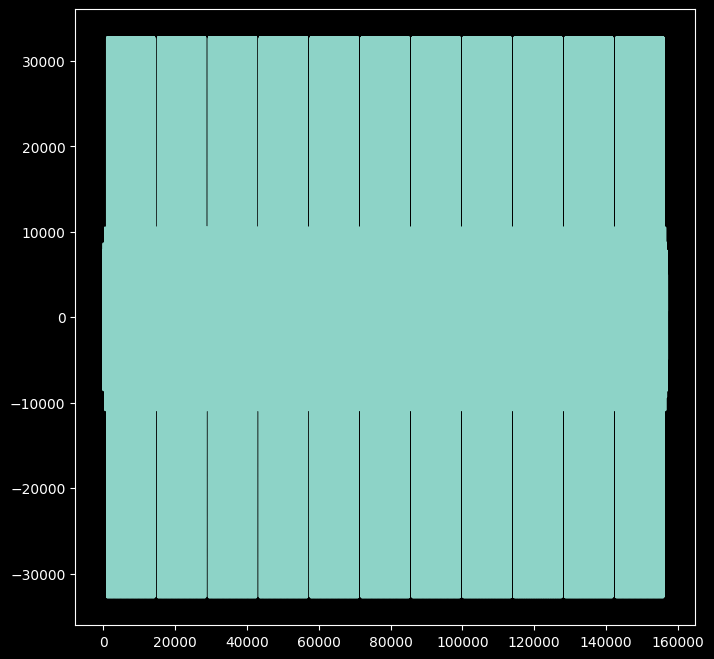

In [5]:
# Plot Audio Signal
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(signal_data)

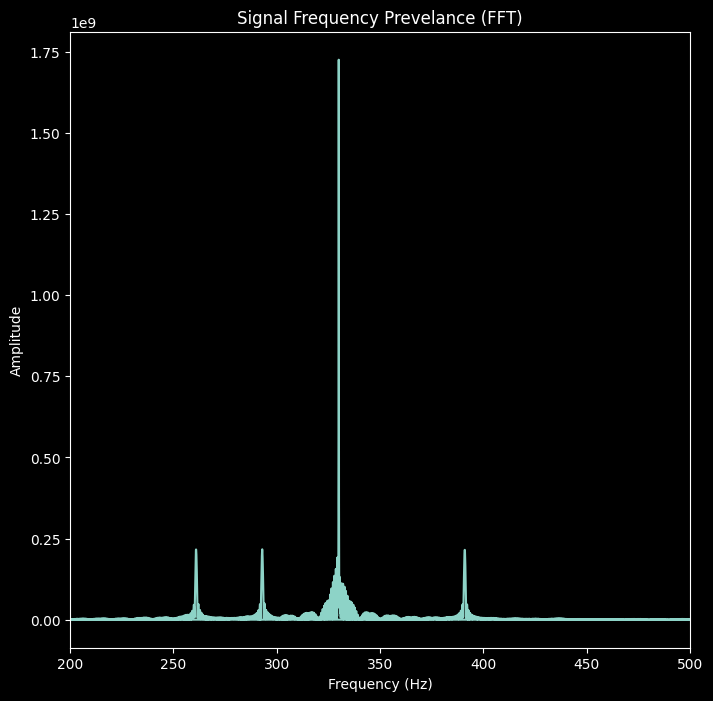

In [15]:
# Fast Fourier Transform

# Collect Fast Fourier Transform Data
fourier_transform = abs(fft(signal_data))
freqs = fftfreq(len(fourier_transform), (1/sample_rate))

# Plot Frequency Prevelance
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.savefig("fft_1.png")
plt.show()

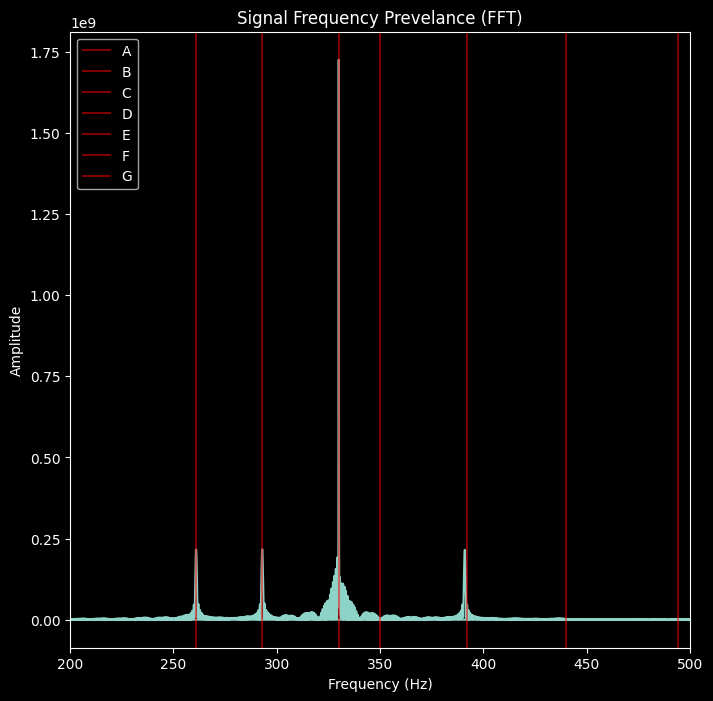

In [16]:
# Plot Frequency Prevelance with Note Overview
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
# A note: 440 hz
plt.axvline(x=440, color="red", label="A",alpha=0.5)
# B Note: 494 hz
plt.axvline(x=494, color="red", label="B",alpha=0.5)
# C Note: 261 hz
plt.axvline(x=261, color="red", label="C",alpha=0.5)
# D Note: 293 hz
plt.axvline(x=293, color="red", label="D",alpha=0.5)
# E Note: 330 hz
plt.axvline(x=330, color="red", label="E",alpha=0.5)
# F Note: 350 hz
plt.axvline(x=350, color="red", label="F",alpha=0.5)
# G Note: 392 hz
plt.axvline(x=392, color="red", label="G",alpha=0.5)
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig("fft_2.png")
plt.show()

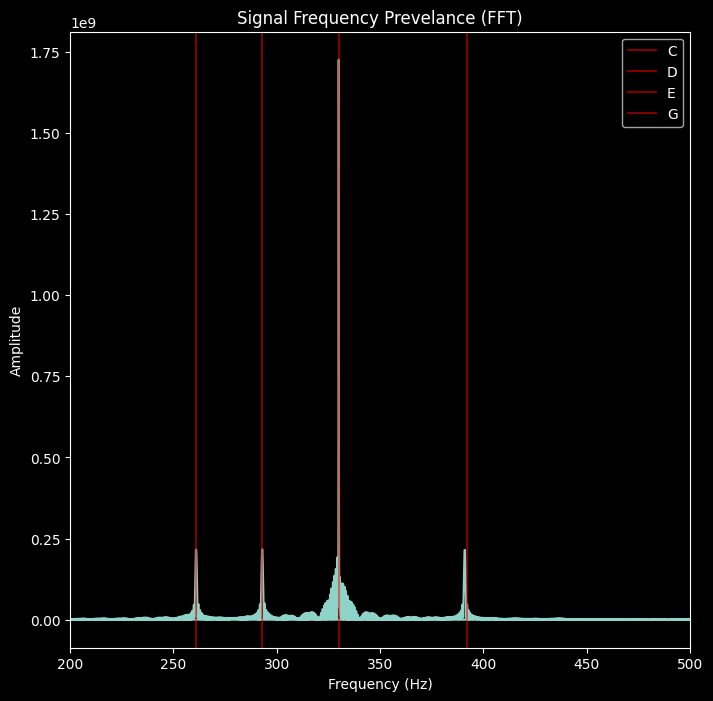

In [18]:
# Plot Frequency Prevelance with Note Overview
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
# C Note: 261 hz
plt.axvline(x=261, color="red", label="C",alpha=0.5)
# D Note: 293 hz
plt.axvline(x=293, color="red", label="D",alpha=0.5)
# E Note: 330 hz
plt.axvline(x=330, color="red", label="E",alpha=0.5)
# G Note: 392 hz
plt.axvline(x=392, color="red", label="G",alpha=0.5)
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig("fft_3.png")
plt.show()